In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from scipy.stats import laplace, norm
from scipy.optimize import curve_fit

%matplotlib inline

Total data used 200/200


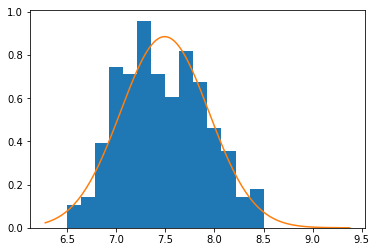

In [3]:
def plot_dists(efac, bins = [None]):
    #efac = 1.45
    data = pd.read_csv("../../csvs/Solar_feats/solar_{0}_1e9_200.csv".format(efac), index_col=0)
    times = data["t"].values
    total = times.shape[0]
    #print(total)
    times = np.log10(times//2./np.pi)
    is_valid = np.where(np.isnan(times) ==False)[0]
    #print(is_valid.shape)
    valid_times = times[is_valid]
    final = is_valid.shape[0]
    print("Total data used {0}/{1}".format(final, total))
    if bins[0] == None:
        plt.hist(valid_times, normed = 1)
    else:
        plt.hist(valid_times, normed = 1, bins = bins)
    #plt.axvline(np.log10(5000000000))
    
    
    mu_fit, sig_fit =  norm.fit(valid_times)
    # mean sigma from non resonant systems
    rv = norm(loc = mu_fit, scale = 0.4504391160881758)
    x= np.linspace(valid_times.min() - 0.25, valid_times.max()+0.25, 150)
    plt.plot(x, rv.pdf(x))
    
#plot_dists(1.45)
bins = np.linspace(6.5, 8.5, 15)
plot_dists(1.45, bins = bins)

Total data used 161/200


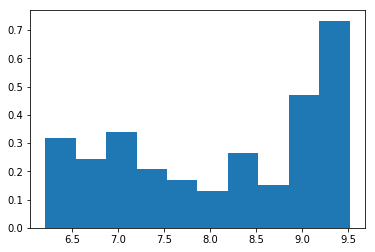

In [8]:
plot_dists(1.4)

Total data used 146/200


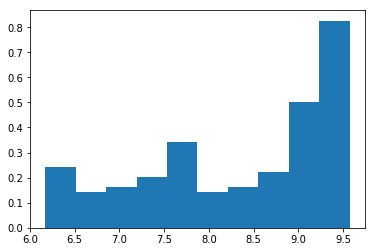

In [9]:
plot_dists(1.35)

Total data used 39/200


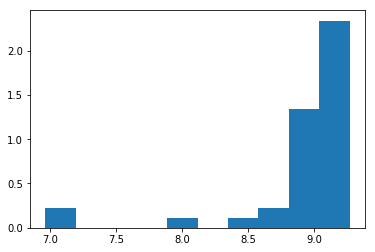

In [10]:
plot_dists(1.3)

Total data used 0/200


/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


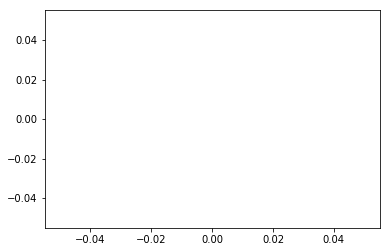

In [11]:
plot_dists(1.25)